In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"]=10

In [2]:
#SP1
doses=[125,250,500]
GFP2=[1.68559,2.84942,3.74315]
SEMs=[0.25591,0.12747,0.51599]

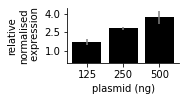

In [3]:
#S3B
fig,ax=plt.subplots(1,1,figsize=(2,1))
ax.bar(range(3),GFP2,width=0.8,color="k",yerr=SEMs,ecolor="gray")
ax.set_xticks(range(3))
ax.set_xticklabels(map(str,doses))
ax.set_xlabel("plasmid (ng)")
ax.set_ylabel("relative\nnormalised\n expression")
ax.set_yticks([1,2.5,4])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig("../figs/qPCRSP1.pdf",bbox_inches="tight")
plt.show()

In [4]:
a1=1
a2=5

b1=3
b2=3

k1=1
k2=1
kab=(a1+b1+1)*k1*(a2+b2+1)*k2/((a1+b1+1)*k1+(a2+b2+1)*k2)
kb=(0+b1+1)*k1*(0+b2+1)*k2/((0+b1+1)*k1+(0+b2+1)*k2)
ka=(a1+0+1)*k1*(a2+0+1)*k2/((a1+0+1)*k1+(a2+0+1)*k2)
print(kab)
print(ka+kb)
print(ka,kb)


3.2142857142857144
3.5
1.5 2.0


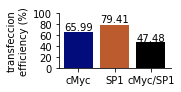

In [5]:
#This reproduces Fig S3D, but that one was made by Dhana Friedrich in matlab
colorSP1="#bc5b2d"
colorcMyc="#030c7b"

transfection=[65.99,79.41,47.48]
fig,ax=plt.subplots(1,1,figsize=(2,1))
ax.bar(range(3),transfection,width=0.8,color=[colorcMyc,colorSP1,"k"])
for i in range(3):
    ax.text(i-0.4,transfection[i]*1.05,transfection[i])
ax.set_xticks(range(3))
ax.set_xticklabels(["cMyc","SP1","cMyc/SP1"])
#ax.set_xlabel("plasmid (ng)")
ax.set_ylabel("transfeccion\nefficiency (%)")
ax.set_yticks(range(0,110,20))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig("../figs/IFtransfection.pdf",bbox_inches="tight")
plt.show()

In [6]:
#This can be used to look at the distributions of IF in response to cMyc, SP1, and the combination

In [7]:
#data=np.loadtxt("/Users/rosamartinezcorral/Dropbox (HMS)/syn-dhana-rosa/2021_08_NewData_Dhana/SynTF abundance_IF/FI_cmyc_SP1_SP1cmyc_595.csv",delimiter=",")
data=np.loadtxt("./data/FI_cmyc_SP1_SP1cmyc_595.csv",delimiter=",")

In [8]:
data

array([[ 70.117,  53.153,  57.545],
       [ 78.887,  74.894,  52.214],
       [ 80.105, 202.63 ,  58.821],
       ...,
       [    nan,  58.492,     nan],
       [    nan, 113.44 ,     nan],
       [    nan,  62.906,     nan]])

In [9]:
import seaborn as sns
import pandas as pd

In [10]:
df=pd.DataFrame({"cMyc":data[:,0],"SP1":data[:,1],"cMycSP1":data[:,2]})

In [11]:
pd.melt(df)

,variable,value
0,cMyc,70.117
1,cMyc,78.887
2,cMyc,80.105
3,cMyc,53.427
4,cMyc,51.336
...,...,...
124492,cMycSP1,NaN
124493,cMycSP1,NaN
124494,cMycSP1,NaN
124495,cMycSP1,NaN


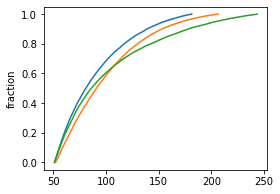

80.856 89.54155935622317
90.809 99.0771007735126
86.042 102.52787600062786


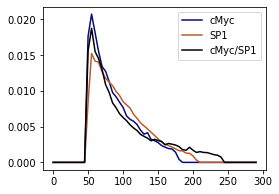

In [13]:
#note that the distributions in the paper are smoothed, since that is made using the ksdensity in matlab
fig,ax=plt.subplots(1,1,figsize=(4,3))
dataars=[]
for i in range(3):
    ar=data[:,i].copy()
    ar=ar[~np.isnan(ar)]
    dataars.append(ar)
    sorted_=np.sort(ar)
    cumsum=np.arange(len(ar))/len(ar)
    ax.step(sorted_,cumsum)
    ax.set_ylabel("fraction")
plt.show()

labels=["cMyc","SP1","cMyc/SP1"]
colors=[colorcMyc,colorSP1,"k"]
fig,ax=plt.subplots(1,1,figsize=(4,3))
for i in range(3):
    ar=dataars[i]
    print(np.median(ar),np.mean(ar))
    hist,edges=np.histogram(ar,bins=np.arange(0,300,5),density=True)
    ax.plot(edges[:-1],hist,label=labels[i],color=colors[i])
ax.legend()
plt.show()